## (Before using the code, read the technical note attached to this repository to see in detail the formulas and values used for this plot!)

## Required libraries for the plot

In [2]:
import numpy
import pylab
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cmath
import random

## Random angle generator in a range from 0 to 2$\pi$

The purpose of this part is to generate random angles to see how the plot behaves taking in consideration that the plot is a $\langle{m_{ee}}\rangle$ vs $m_{light}$, so it will show only a curve, but if we include the different random angle combinations, all the curves will combine until it turns into the actual plot with all possible angle variations 

(Note: this is just to check that the angles are inside certain specific boundaries, running 1000 samples will take a lot of time to run, or the code itself would not run due to the quantity of samples, and after locate the boundaries the plots made by this method and its code will be removed)  

In [4]:
#Angles
A=numpy.array([])
B=numpy.array([])
for i in range (0,1000):
    Alpha12=random.uniform(0, 2*numpy.pi)
    Alpha13=random.uniform(0, 2*numpy.pi)
    if Alpha12 not in A: 
        A=numpy.append(A, Alpha12)
    if Alpha13 not in B: 
        B=numpy.append(B, Alpha13)

## Parameters and mass equations used

The parameters and fixed values are listed here separated in NH and IH parameters, same situation for the mass equations (equation 7 at the technical note), for the NH all the mass equations are in terms of $m_1$ and for the IH, in terms of $m_3$, here are not only listed the best fit values, there are also listed the +3/-3 $\sigma$ values for all the masses to get not only the best fit value plot, but also including the uncertainties for the plot 

In [6]:
#Normal hierarchy parameters (Best Fit)

NHs12=0.307
NHs13=0.022
NHc12=0.693
NHc13=0.978

solarmass=0.0000753
atmmass=0.0025283

#Normal hierarchy parameters (3 sigma)

maxNHs12=0.346
minNHs12=0.268

maxNHs13=0.0241
minNHs13=0.0199

maxNHc12=0.732
minNHc12=0.654

maxNHc13=0.9801
minNHc13=0.9759

maxsolarmass=0.0000807
minsolarmass=0.0000699

maxatmmass=0.0025631
minatmmass=0.0024935

NHm1=numpy.linspace(0.0001,0.001,2000) 
NHm1=numpy.append(NHm1, numpy.linspace(0.001,0.01,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.01,0.1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(0.1,1,2000))
NHm1=numpy.append(NHm1, numpy.linspace(1,10,2000))

maxNHm2=(NHm1**2+maxsolarmass)**(1/2)
NHm2=(NHm1**2+solarmass)**(1/2)
minNHm2=(NHm1**2+minsolarmass)**(1/2)

maxNHm3=(NHm1**2+maxatmmass)**(1/2)
NHm3=(NHm1**2+atmmass)**(1/2)
minNHm3=(NHm1**2+minatmmass)**(1/2)

#solarmass=del_m21^2
#atmmass=del_m31^2

In [8]:
#Inverted Hierarchy parameters (Best Fit)

IHs12=0.307
IHs13=0.022
IHc12=0.693
IHc13=0.978

Isolarmass=0.0000753
Iatmmass=0.002536

#Inverted hierarchy parameters (3 sigma)

maxIHs12=0.346
minIHs12=0.268

maxIHs13=0.0241
minIHs13=0.0199

maxIHc12=0.732
minIHc12=0.654

maxIHc13=0.9801
minIHc13=0.9759

maxIsolarmass=0.0000807
minIsolarmass=0.0000699

maxIatmmass=0.002638
minIatmmass=0.002434

IHm3=numpy.linspace(0.0001,0.001,2000) 
IHm3=numpy.append(IHm3, numpy.linspace(0.001,0.01,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.01,0.1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(0.1,1,2000))
IHm3=numpy.append(IHm3, numpy.linspace(1,10,2000))

maxIHm2=(IHm3**2+maxIsolarmass+maxIatmmass)**(1/2)
IHm2=(IHm3**2+Isolarmass+Iatmmass)**(1/2)
minIHm2=(IHm3**2+minIsolarmass+minIatmmass)**(1/2)

maxIHm1=(IHm3**2+maxIatmmass)**(1/2)
IHm1=(IHm3**2+Iatmmass)**(1/2)
minIHm1=(IHm3**2+minIatmmass)**(1/2)

#solarmass=del_m21^2
#atmmass=del_m31^2

## Plot generator

This is the most important part of the code, on this cell is located the original $\langle{m_{ee}}\rangle$ formula and is written in terms of $m_{light}$ that is $m_{1}$ for NH and $m_{3}$ for IH, since there are infinite many possible combinations of parameters $\phi_{12}$ and $\phi_{13}$ (equation 6 of the technical note), instead of running a code with infinite many curves, the code will just plug the curves that will bound all the possible angle combinations and fill the space between each curve to optimize compilation time and computer resources, the angles that created the boundaries were calculated previously using an optimization method (details and other equations used are located at the technical note)  however, for a quick test, it is included a loop that will plot 1000 samples of the random generated angles to make sure the boundaries were chosen properly  

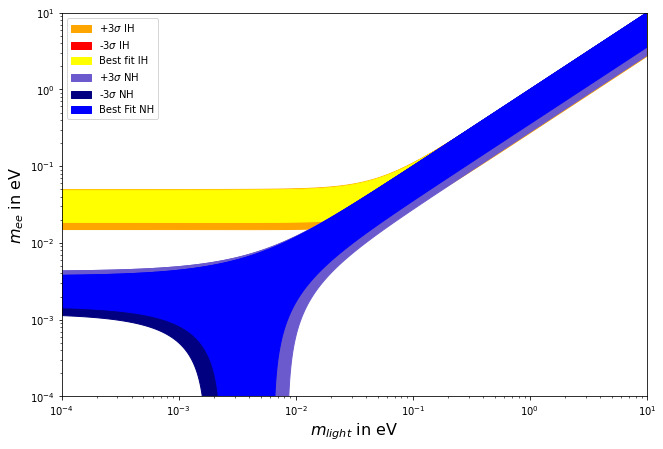

In [10]:
plt.figure(figsize=(9,6))

#for i in range(0,1000):
#    IHm3=numpy.linspace(0,1,10000)
#    IHmee=abs(IHc12*IHc13*IHm1 + IHs12*IHc13*IHm2*cmath.exp(complex(0,A[i])) + IHs13*IHm3*cmath.exp(complex(0,B[i])))

#    plt.plot(IHm3,IHmee,color="yellow",linestyle="-",linewidth=1, alpha=1)
    

maxIHmee1=abs(minIHc12*minIHc13*maxIHm1 + maxIHs12*minIHc13*maxIHm2 + maxIHs13*IHm3)
IHmee1=abs(IHc12*IHc13*IHm1 + IHs12*IHc13*IHm2 + IHs13*IHm3) #All masses different, both angles=0
minIHmee1=abs(maxIHc12*maxIHc13*minIHm1 + minIHs12*maxIHc13*minIHm2 + minIHs13*IHm3)

maxIHmee2=abs(minIHc12*minIHc13*maxIHm1 - maxIHs12*minIHc13*maxIHm2 - maxIHs13*IHm3)
IHmee2=abs(IHc12*IHc13*IHm1 - IHs12*IHc13*IHm2 - IHs13*IHm3) #All masses different, both angles=pi
minIHmee2=abs(maxIHc12*maxIHc13*minIHm1 - minIHs12*maxIHc13*minIHm2 - minIHs13*IHm3)

#plt.plot(IHm3,maxIHmee1,color="black",linestyle="-",linewidth=1, alpha=0.5)
#plt.plot(IHm3,IHmee1,color="black",linestyle="-",linewidth=1, alpha=1)
#plt.plot(IHm3,minIHmee1,color="black",linestyle="-",linewidth=1, alpha=0.5)

#plt.plot(IHm3,maxIHmee2,color="red",linestyle="-",linewidth=1, alpha=0.5)
#plt.plot(IHm3,IHmee2,color="gray",linestyle="-",linewidth=1, alpha=1)
#plt.plot(IHm3,minIHmee2,color="red",linestyle="-",linewidth=1, alpha=0.5)

plt.fill_between(IHm3, maxIHmee1, maxIHmee2, color="orange",label="+3$\sigma$ IH")

plt.fill_between(IHm3, minIHmee1, minIHmee2, color="red",label="-3$\sigma$ IH")

plt.fill_between(IHm3, IHmee1, IHmee2, color="yellow", label="Best fit IH")


#for i in range(0,1000):
#    NHm1=numpy.linspace(0,1,10000)
#    NHmee=abs(NHc12*NHc13*NHm1 + NHs12*NHc13*NHm2*cmath.exp(complex(0,A[i])) + NHs13*NHm3*cmath.exp(complex(0,B[i])))

#    plt.plot(NHm1,NHmee,color="blue",linestyle="-",linewidth=1, alpha=1)
    
maxNHmee1=abs(minNHc12*minNHc13*NHm1 - maxNHs12*minNHc13*maxNHm2 + maxNHs13*maxNHm3)    
NHmee1=abs(NHc12*NHc13*NHm1 - NHs12*NHc13*NHm2 + NHs13*NHm3) #All masses different, first angle=pi, second angle=0
minNHmee1=abs(maxNHc12*maxNHc13*NHm1 - minNHs12*maxNHc13*minNHm2 + minNHs13*minNHm3)

maxNHmee2=abs(minNHc12*minNHc13*NHm1 + maxNHs12*minNHc13*maxNHm2 + maxNHs13*maxNHm3)
NHmee2=abs(NHc12*NHc13*NHm1 + NHs12*NHc13*NHm2 + NHs13*NHm3) #All masses different, both angles=0
minNHmee2=abs(maxNHc12*maxNHc13*NHm1 + minNHs12*maxNHc13*minNHm2 + minNHs13*minNHm3)

maxNHmee3=abs(minNHc12*minNHc13*NHm1 - maxNHs12*minNHc13*maxNHm2 - maxNHs13*maxNHm3)
NHmee3=abs(NHc12*NHc13*NHm1 - NHs12*NHc13*NHm2 - NHs13*NHm3) #All masses different, both angles=pi
minNHmee3=abs(maxNHc12*maxNHc13*NHm1 - minNHs12*maxNHc13*minNHm2 - minNHs13*minNHm3)

#plt.plot(NHm1,maxNHmee1,color="gray",linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,NHmee1,color="gray", linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,minNHmee1,color="gray",linestyle="-",linewidth=1, alpha=0.5)

#plt.plot(NHm1,maxNHmee2,color="black",linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,NHmee2,color="black",linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,minNHmee2,color="black",linestyle="-",linewidth=1, alpha=0.5)

#plt.plot(NHm1,maxNHmee3,color="pink",linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,NHmee3,color="red",linestyle="-",linewidth=1, alpha=1)
#plt.plot(NHm1,minNHmee3,color="red",linestyle="-",linewidth=1, alpha=0.5)

plt.fill_between(NHm1, maxNHmee1, maxNHmee2, color="slateblue",label="+3$\sigma$ NH")
plt.fill_between(NHm1, maxNHmee2, maxNHmee3, color="slateblue")
plt.fill_between(NHm1, maxNHmee1, 0,where=(NHm1<0.0084)&(NHm1>0.003), color="slateblue", alpha=1)

plt.fill_between(NHm1, minNHmee1, minNHmee2, color="navy", label="-3$\sigma$ NH")
plt.fill_between(NHm1, minNHmee2, minNHmee3, color="navy")
plt.fill_between(NHm1, minNHmee1, 0,where=(NHm1<0.005)&(NHm1>0.0019), color="navy", alpha=1)

plt.fill_between(NHm1, NHmee1, NHmee2, color="blue",label="Best Fit NH")
plt.fill_between(NHm1, NHmee2, NHmee3, color="blue", alpha=1)
plt.fill_between(NHm1, NHmee1, 0,where=(NHm1<0.0064)&(NHm1>0.0025), color="blue", alpha=1)

plt.xscale("log")
plt.yscale("log")

plt.xlim(0.0001,10)
plt.ylim(0.0001,10)
plt.tight_layout()
plt.xlabel("$m_{light}$ in eV",fontsize=16)
plt.ylabel("$m_{ee}$ in eV",fontsize=16)
plt.legend(fontsize=10,loc=2)
plt.savefig('Lobster plot 3 neutrinos.png')
plt.show()


In [7]:
#print(plt.rcParams["figure.figsize"])

<Figure size 432x288 with 0 Axes>